In [23]:
import sys
sys.path.extend(['/home/quic/QUIC-Projects'])

import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
DATA_DIR = Path('/home/quic/QUIC-Projects/summary_ipynb/2021/10 October/15 Fri/Exp2(trs=64)')
OBJ_FUNC = r'$\mathcal{L}_{\phi, \lambda}$'

In [24]:
# plt.style.use(['science', 'nature', 'no-latex'])
plt.style.use('./styles/figstyle.mplstyle')
plt.style.reload_library()

In [25]:
from pandas import read_csv, DataFrame
data = read_csv(DATA_DIR/'sample_summary.csv')

X = np.load(DATA_DIR/'Dataset #0/X.npy')
Xt = np.load(DATA_DIR/'Dataset #0/Xt.npy')
y = np.load(DATA_DIR/'Dataset #0/y.npy')
yt = np.load(DATA_DIR/'Dataset #0/yt.npy')

In [4]:
from itertools import product
min_select_result = DataFrame(columns=data.columns)
for cid, ly in product(range(1, 20), range(1, 9)):
    min_val = min(data.loc[(data['circuit_id']==cid) & (data['layer']==ly)]['last_cost_avg'])
    data_df = data.loc[(data['circuit_id']==cid) & (data['layer']==ly)]
    min_select_result = min_select_result.append(data_df.loc[data_df['last_cost_avg']==min_val], ignore_index=True)
    
min_select_result.loc[min_select_result['circuit_id']==15]
    

,dataset,circuit_id,layer,num_params,expr,entcap,num_iter,last_cost_avg,accuracy
112,0,15,1,6,0.567396,0.677565,42,0.114346,0.926667
113,0,15,2,12,0.189553,0.744091,49,0.113266,0.940000
114,0,15,3,18,0.090994,0.874990,140,0.078434,0.973333
115,0,15,4,24,0.045076,0.894793,107,0.083107,0.966667
116,0,15,5,30,0.077400,0.922199,181,0.068390,0.926667
117,0,15,6,36,0.067235,0.925718,85,0.096779,0.873333
118,0,15,7,42,0.051004,0.935232,132,0.090435,0.946667
119,0,15,8,48,0.070495,0.936841,79,0.086998,0.906667


In [5]:
data.loc[(data['circuit_id']==15) & (data['layer']==3)]

,dataset,circuit_id,layer,num_params,expr,entcap,num_iter,last_cost_avg,accuracy
912,0,15,3,18,0.076898,0.873254,109,0.121059,0.946667
913,0,15,3,18,0.087281,0.877664,83,0.081848,0.906667
914,0,15,3,18,0.090994,0.874990,140,0.078434,0.973333
915,0,15,3,18,0.092984,0.870342,82,0.147655,0.933333
916,0,15,3,18,0.092862,0.870824,100,0.103001,0.933333
917,0,15,3,18,0.098910,0.870048,91,0.115814,0.940000
918,0,15,3,18,0.104322,0.873683,54,0.131721,0.946667
919,0,15,3,18,0.073533,0.877178,41,0.117699,0.866667


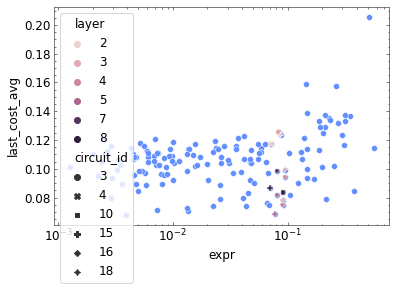

In [6]:
%matplotlib inline
import seaborn as sns
sns.scatterplot(data=min_select_result, x='expr', y='last_cost_avg')
sns.scatterplot(data=min_select_result.loc[(min_select_result['expr']>0.07) & (min_select_result['expr']<0.1) & (min_select_result['last_cost_avg']<1)], x='expr', y='last_cost_avg', hue='layer', style='circuit_id')
plt.xscale('log')

In [7]:
import json
with open(DATA_DIR / '(15, 5)-1024/full_result.json', 'r') as f:
    f_vector = json.load(f)['f']
mask = (f_vector * (2*yt-1) > 0)

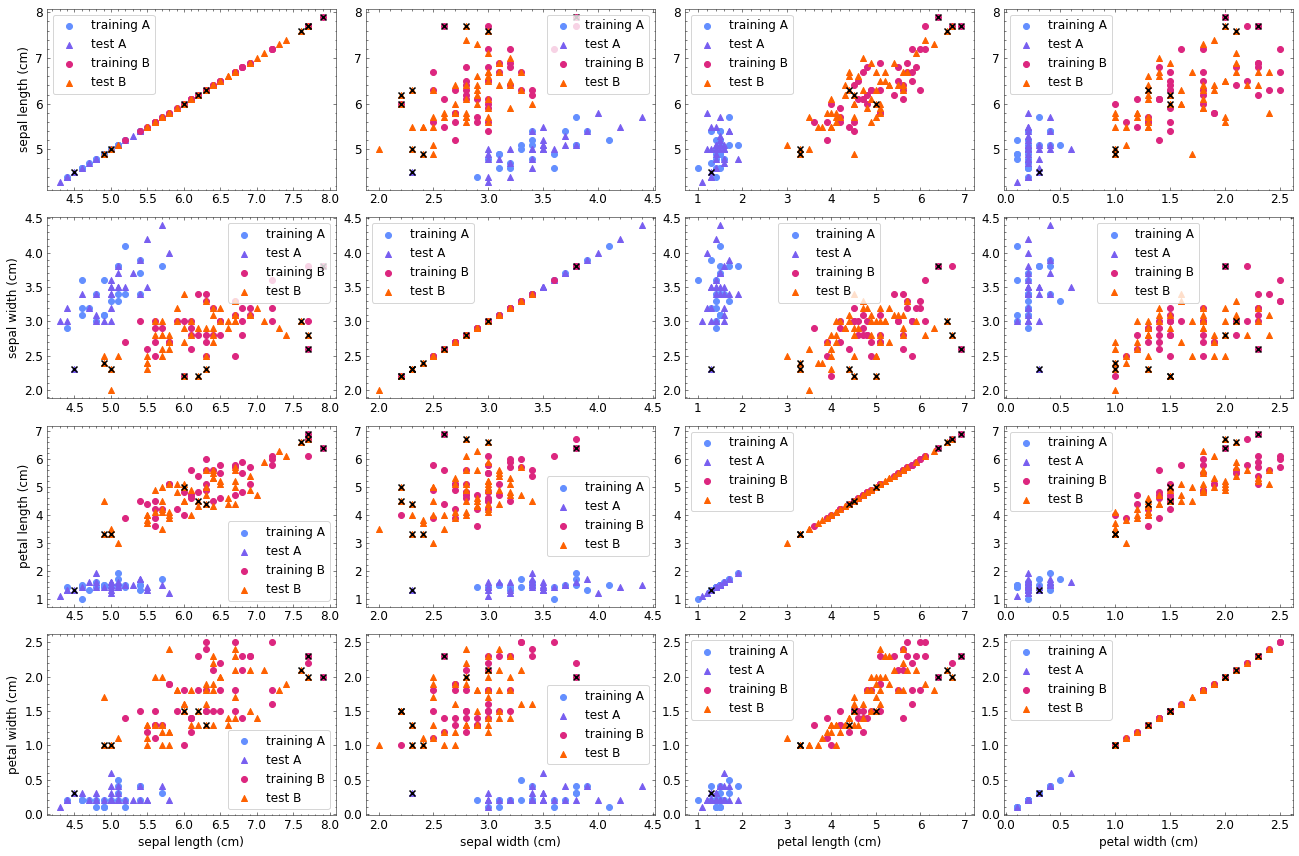

In [8]:
%matplotlib inline
from sklearn.datasets import load_iris
ds = load_iris()

test_mask = []
for j, xt in enumerate(Xt):
    test_mask.append(True)
    for x in X:
        if np.all(x==xt):
            test_mask[-1]=False
            break
test_mask = np.asarray(test_mask)

training_iris_data = ds.data[~test_mask]
training_iris_target = ds.target[~test_mask]
test_iris_data = ds.data[test_mask]
test_iris_target = ds.target[test_mask]
default_fig_size = plt.rcParams['figure.figsize']

fig, axes = plt.subplots(4, 4, sharex=False, sharey=False, squeeze=True, figsize=(3*default_fig_size[0], 3*default_fig_size[1]))
from itertools import product
for e1, e2 in product(range(4), repeat=2):
    ax = axes[e2, e1]
    ax.scatter(training_iris_data[training_iris_target==0, e1], training_iris_data[training_iris_target==0, e2], marker='o', label='training A')
    ax.scatter(test_iris_data[test_iris_target==0, e1], test_iris_data[test_iris_target==0, e2], marker='^', label='test A')
    ax.scatter(training_iris_data[training_iris_target!=0, e1], training_iris_data[training_iris_target!=0, e2], marker='o', label='training B')
    ax.scatter(test_iris_data[test_iris_target!=0, e1], test_iris_data[test_iris_target!=0, e2], marker='^', label='test B')

    # ax.plot(Xt[~mask, e1], Xt[~mask, e2], marker='x', mec='k', mfc='none', markersize=10, linestyle='none')
    ax.scatter(ds.data[~mask, e1], ds.data[~mask, e2], marker='x', color='k')

    ax.legend()
    if e2==3:
        ax.set_xlabel(ds.feature_names[e1])
    if e1==0:
        ax.set_ylabel(ds.feature_names[e2])
plt.tight_layout()
plt.savefig('./figs/si/iris_dataset.png')

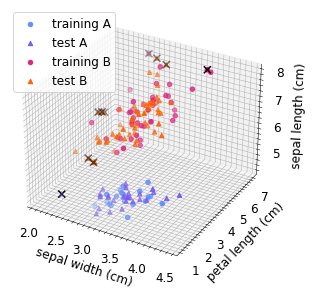

In [9]:

%matplotlib inline

fig = plt.figure(figsize=(5, 4))
ax = plt.axes(projection='3d')

e1, e2, e3 = 1, 2, 0
default_size = plt.rcParams['lines.markersize']

ax.scatter(training_iris_data[training_iris_target==0, e1], training_iris_data[training_iris_target==0, e2], training_iris_data[training_iris_target==0, e3], marker='o', label='training A')
ax.scatter(test_iris_data[test_iris_target==0, e1], test_iris_data[test_iris_target==0, e2], test_iris_data[test_iris_target==0, e3], marker='^', label='test A')
ax.scatter(training_iris_data[training_iris_target!=0, e1], training_iris_data[training_iris_target!=0, e2], training_iris_data[training_iris_target!=0, e3], marker='o', label='training B')
ax.scatter(test_iris_data[test_iris_target!=0, e1], test_iris_data[test_iris_target!=0, e2], test_iris_data[test_iris_target!=0, e3], marker='^', label='test B')

ax.scatter(ds.data[~mask, e1], ds.data[~mask, e2], ds.data[~mask, e3], marker='x', color='k', s=50)

ax.legend()
ax.set_xlabel(ds.feature_names[e1])
ax.set_ylabel(ds.feature_names[e2])
ax.set_zlabel(ds.feature_names[e3])
plt.tight_layout()
fig.savefig('./figs/si/iris_class.png')
plt.show()

In [10]:
"""
import dill
from tqdm.notebook import tqdm
# with open(DATA_DIR / 'Samples/Circuit #15/layer=4/4/nqsvm', 'rb') as f:
with open(DATA_DIR / 'Samples/Circuit #15/layer=5/1/nqsvm', 'rb') as f:
    qasvm = dill.load(f)
    
_init = qasvm.parameters.copy()
_init.update(qasvm.initial_point)
var_qc = qasvm.var_form.assign_parameters(dict(zip(qasvm.var_form.parameters, _init)))
var_qc.save_statevector()
result = qasvm.quantum_instance.execute(var_qc)
initial_point = np.abs(result.get_statevector()) ** 2

from copy import deepcopy
from classifiers.quantum.qasvm import PseudoNormQSVM
from classifiers.optimizer import tSPSA
from classifiers.callback import CostParamStorage
feature_map = deepcopy(qasvm.feature_map)

pqasvm = PseudoNormQSVM(data=qasvm.data, label=qasvm.label, quantum_instance=qasvm.quantum_instance, lamda=qasvm.lamda, feature_map=feature_map, var_form=None, initial_point=initial_point)

storage = CostParamStorage()
optimizer = tSPSA(maxiter=2**15, blocking=True, last_avg=16, callback=storage)
for epoch in tqdm(range(1, 2**15 + 1)):
    optimizer.step(pqasvm.cost_fn, pqasvm.parameters)
    if storage.num_accepted() > 2 * 16 and storage.last_cost_avg(2 * 16, ignore_rejected=True) < \
            storage.last_cost_avg(16, ignore_rejected=True):
        break
pqasvm.parameters = storage.last_avg(16, ignore_rejected=True)
last_cost = storage.last_cost_avg(16, ignore_rejected=True)
"""

"\nimport dill\nfrom tqdm.notebook import tqdm\n# with open(DATA_DIR / 'Samples/Circuit #15/layer=4/4/nqsvm', 'rb') as f:\nwith open(DATA_DIR / 'Samples/Circuit #15/layer=5/1/nqsvm', 'rb') as f:\n    qasvm = dill.load(f)\n    \n_init = qasvm.parameters.copy()\n_init.update(qasvm.initial_point)\nvar_qc = qasvm.var_form.assign_parameters(dict(zip(qasvm.var_form.parameters, _init)))\nvar_qc.save_statevector()\nresult = qasvm.quantum_instance.execute(var_qc)\ninitial_point = np.abs(result.get_statevector()) ** 2\n\nfrom copy import deepcopy\nfrom classifiers.quantum.qasvm import PseudoNormQSVM\nfrom classifiers.optimizer import tSPSA\nfrom classifiers.callback import CostParamStorage\nfeature_map = deepcopy(qasvm.feature_map)\n\npqasvm = PseudoNormQSVM(data=qasvm.data, label=qasvm.label, quantum_instance=qasvm.quantum_instance, lamda=qasvm.lamda, feature_map=feature_map, var_form=None, initial_point=initial_point)\n\nstorage = CostParamStorage()\noptimizer = tSPSA(maxiter=2**15, blocking=T

In [11]:
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
c15_yb = c3 = color_list[3]
c15_nb = color_list[2]
psd_yb = c1 = color_list[0]
psd_nb = color_list[1]
c2= color_list[4]

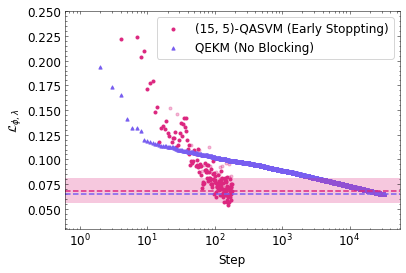

In [12]:
%matplotlib inline

"""
_tmp_path = DATA_DIR / 'Classical'
_tmp_path.mkdir(exist_ok=True)
pqasvm.save(_tmp_path / 'qasvm')
storage.save(_tmp_path / 'storage')
"""
import dill
with open(DATA_DIR / 'Classical' / 'storage', 'rb') as f:
#with open(DATA_DIR / 'Classical' / 'storage_blocking', 'rb') as f:
    storage = dill.load(f)
with open(DATA_DIR / 'Classical' / 'qasvm', 'rb') as f:
#with open(DATA_DIR / 'Classical' / 'qasvm_blocking', 'rb') as f:
    pqasvm = dill.load(f)
last_cost = storage.last_cost_avg(16, ignore_rejected=True)


with open(DATA_DIR / 'Dataset #0/Circuit #15/layer=5/1/storage', 'rb') as f:
    qasvm_storage = dill.load(f)
    
df1 = qasvm_storage.data
df2 = storage.data
plt.scatter(df1.loc[df1['Accepted']==True]['Step'], df1.loc[df1['Accepted']==True]['Cost'], marker='.', c=c15_nb, label='(15, 5)-QASVM (Early Stoppting)')
#plt.scatter(range(len(df1.loc[df1['Accepted']==True])), df1.loc[df1['Accepted']==True]['Cost'], marker='.', c=color1, label='QASVM')
plt.scatter(df1.loc[df1['Accepted']==False]['Step'], df1.loc[df1['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=c15_nb)
plt.scatter(df2.loc[df2['Accepted']==True]['Step'], df2.loc[df2['Accepted']==True]['Cost'], marker='^', c=psd_nb, label='QEKM (No Blocking)', s=10)
#plt.scatter(range(len(df2.loc[df2['Accepted']==True])), df2.loc[df2['Accepted']==True]['Cost'], marker='.', c=color2, label='QEKM')
plt.scatter(df2.loc[df2['Accepted']==False]['Step'], df2.loc[df2['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=psd_nb)
plt.axhline(last_cost, 0, 1, color=psd_nb, linestyle='--')
plt.axhline(qasvm_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=c15_nb, linestyle='--')
plt.axhspan(ymin=qasvm_storage.last_cost_avg(16, ignore_rejected=True)-2*qasvm_storage.last_cost_std(16, ignore_rejected=True),
            ymax=qasvm_storage.last_cost_avg(16, ignore_rejected=True)+2*qasvm_storage.last_cost_std(16, ignore_rejected=True),
            xmin=0, xmax=1, facecolor=c15_nb, alpha=0.25)
plt.ylim([None, 0.25])
# plt.xlim([-len(df1)*.05, len(df1)*1.05])
plt.xscale('log')
plt.xlabel('Step')
plt.ylabel(OBJ_FUNC)
plt.legend(loc='upper right')
plt.savefig('./figs/si/spsa_progress.png')
plt.show()

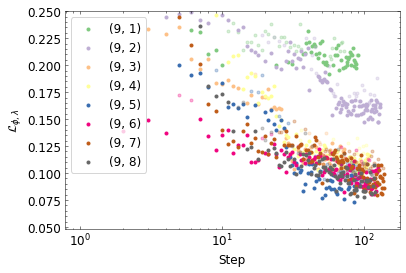

In [13]:
%matplotlib inline

circuit_prop = {
    15:[0, 2, 2, 3, 1, 1, 0, 2],
    9: [2, 0, 2, 6, 5, 6, 5, 7]
}

circuit_id = 9
many_colors = plt.cm.Accent(range(8))
for layer in range(1, 9):
    with open(DATA_DIR / f'Dataset #0/Circuit #{circuit_id}/layer={layer}/{circuit_prop[circuit_id][layer-1]}/storage', 'rb') as f:
    # with open(DATA_DIR / '({circuit_id}, 5)-1024/storage', 'rb') as f:
        qasvm_storage = dill.load(f)
    with open(DATA_DIR / f'Dataset #0/Circuit #{circuit_id}/layer={layer}/{circuit_prop[circuit_id][layer-1]}/result.json', 'r') as f:
        with open(DATA_DIR / f'Dataset #0/Circuit #{circuit_id}/layer={layer}/{circuit_prop[circuit_id][layer-1]}/result.json', 'r') as g:
            qasvm_result = json.load(f).update(json.load(g))

    
        
    df1 = qasvm_storage.data
    plt.scatter(df1.loc[df1['Accepted']==True]['Step'], df1.loc[df1['Accepted']==True]['Cost'], marker='.', color=many_colors[layer-1], label=f'({circuit_id}, {layer})')
    plt.scatter(df1.loc[df1['Accepted']==False]['Step'], df1.loc[df1['Accepted']==False]['Cost'], marker='.', alpha=0.3, color=many_colors[layer-1])

plt.ylim([None, 0.25])
# plt.xlim([-len(df1)*.05, len(df1)*1.05])
plt.xscale('log')
plt.xlabel('Step')
plt.ylabel(OBJ_FUNC)
plt.legend(loc='best')
# plt.savefig('./figs/si/spsa_progress.png')
plt.show()

In [14]:
min_select_result.loc[min_select_result['circuit_id']==9]

,dataset,circuit_id,layer,num_params,expr,entcap,num_iter,last_cost_avg,accuracy
64,0,9,1,6,0.515729,1.000000,92,0.205463,0.666667
65,0,9,2,12,0.143636,1.000000,131,0.158909,0.920000
66,0,9,3,18,0.023590,1.000000,74,0.114620,0.953333
67,0,9,4,24,0.009169,0.988148,109,0.109039,0.900000
68,0,9,5,30,0.008093,0.978046,93,0.089748,0.980000
69,0,9,6,36,0.010102,0.927309,126,0.092010,0.920000
70,0,9,7,42,0.002953,0.936484,140,0.093388,0.940000
71,0,9,8,48,0.003562,0.951171,120,0.089752,0.900000


In [15]:
data.loc[(data['circuit_id']==9) & (data['layer']==8)]

,dataset,circuit_id,layer,num_params,expr,entcap,num_iter,last_cost_avg,accuracy
568,0,9,8,48,0.007080,0.951377,96,0.112915,0.940000
569,0,9,8,48,0.004321,0.952009,64,0.111881,0.800000
570,0,9,8,48,0.003485,0.951068,56,0.117146,0.853333
571,0,9,8,48,0.001935,0.950237,78,0.124599,0.946667
572,0,9,8,48,0.004401,0.950466,137,0.120785,0.933333
573,0,9,8,48,0.004944,0.950744,168,0.099129,0.846667
574,0,9,8,48,0.005433,0.951550,84,0.098091,0.913333
575,0,9,8,48,0.003562,0.951171,120,0.089752,0.900000


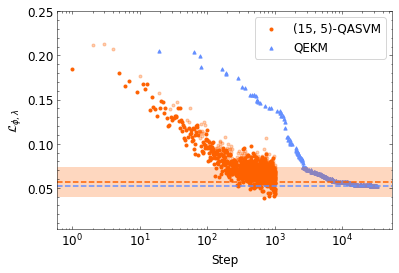

In [16]:
%matplotlib inline

"""
_tmp_path = DATA_DIR / 'Classical'
_tmp_path.mkdir(exist_ok=True)
pqasvm.save(_tmp_path / 'qasvm')
storage.save(_tmp_path / 'storage')
"""
import dill
#with open(DATA_DIR / 'Classical' / 'storage', 'rb') as f:
with open(DATA_DIR / 'Classical' / 'storage_blocking', 'rb') as f:
    storage = dill.load(f)
#with open(DATA_DIR / 'Classical' / 'qasvm', 'rb') as f:
with open(DATA_DIR / 'Classical' / 'qasvm_blocking', 'rb') as f:
    pqasvm = dill.load(f)
last_cost = storage.last_cost_avg(16, ignore_rejected=True)


# with open(DATA_DIR / 'Samples/Circuit #15/layer=4/4/storage', 'rb') as f:
#with open(DATA_DIR / 'Samples/Circuit #15/layer=5/1/storage', 'rb') as f:
with open(DATA_DIR / '(15, 5)-1024/storage', 'rb') as f:
    qasvm_storage = dill.load(f)
    
# df1 = storage.data.iloc[:len(qasvm_storage.data)]
df1 = qasvm_storage.data
df2 = storage.data
plt.scatter(df1.loc[df1['Accepted']==True]['Step'], df1.loc[df1['Accepted']==True]['Cost'], marker='.', c=c15_yb, label='(15, 5)-QASVM')
#plt.scatter(range(len(df1.loc[df1['Accepted']==True])), df1.loc[df1['Accepted']==True]['Cost'], marker='.', c=color1, label='QASVM')
plt.scatter(df1.loc[df1['Accepted']==False]['Step'], df1.loc[df1['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=c15_yb)
plt.scatter(df2.loc[df2['Accepted']==True]['Step'], df2.loc[df2['Accepted']==True]['Cost'], marker='^', c=psd_yb, label='QEKM', s=10)
#plt.scatter(range(len(df2.loc[df2['Accepted']==True])), df2.loc[df2['Accepted']==True]['Cost'], marker='.', c=color2, label='QEKM')
#plt.scatter(df2.loc[df2['Accepted']==False]['Step'], df2.loc[df2['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=psd_yb)
plt.axhline(last_cost, 0, 1, color=psd_yb, linestyle='--')
plt.axhline(qasvm_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=c15_yb, linestyle='--')
plt.axhspan(ymin=qasvm_storage.last_cost_avg(16, ignore_rejected=True)-2*qasvm_storage.last_cost_std(16, ignore_rejected=True),
            ymax=qasvm_storage.last_cost_avg(16, ignore_rejected=True)+2*qasvm_storage.last_cost_std(16, ignore_rejected=True),
            xmin=0, xmax=1, facecolor=c15_yb, alpha=0.25)
plt.ylim([None, 0.25])
# plt.xlim([-len(df1)*.05, len(df1)*1.05])
plt.xscale('log')
plt.xlabel('Step')
plt.ylabel(OBJ_FUNC)
plt.legend(loc='upper right')
plt.savefig('./figs/numanal/spsa_progress_blocking.png')
plt.show()

In [33]:
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#D81B60', '#1E88E5', '#FFC107', '#004D40', '#E3735C']

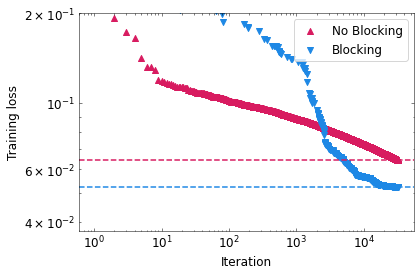

In [42]:
import dill
with open(DATA_DIR / 'Classical' / 'storage', 'rb') as f:
    QEKM_nb_storage = dill.load(f)

with open(DATA_DIR / 'Classical' / 'storage_blocking', 'rb') as f:
    QEKM_yb_storage = dill.load(f)
    
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

df1 = QEKM_nb_storage.data
df2 = QEKM_yb_storage.data
plt.scatter(df1.loc[df1['Accepted']==True]['Step'], df1.loc[df1['Accepted']==True]['Cost'], marker='^', c=colors[0], label='No Blocking')
#plt.scatter(df1.loc[df1['Accepted']==False]['Step'], df1.loc[df1['Accepted']==False]['Cost'], marker='^', alpha=0.3, c=color1)
plt.scatter(df2.loc[df2['Accepted']==True]['Step'], df2.loc[df2['Accepted']==True]['Cost'], marker='v', c=colors[1], label='Blocking')
#plt.scatter(df2.loc[df2['Accepted']==False]['Step'], df2.loc[df2['Accepted']==False]['Cost'], marker='^', alpha=0.3, c=color2)
plt.axhline(QEKM_nb_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=colors[0], linestyle='--')
plt.axhline(QEKM_yb_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=colors[1], linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.ylim([None, 0.2])
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.savefig('./figs/spsa_blocking_effect.pdf', dpi=200)
plt.show()

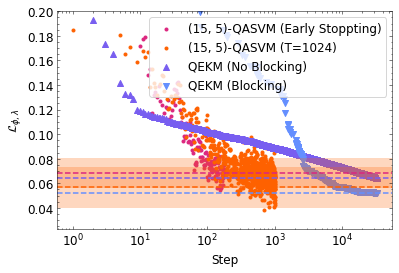

In [18]:
import dill
with open(DATA_DIR / 'Dataset #0/Circuit #15/layer=5/1/storage', 'rb') as f:
    QASVM_15_5_storage = dill.load(f)
with open(DATA_DIR / '(15, 5)-1024/storage', 'rb') as f:
    QASVM_15_5_2024_storage = dill.load(f)
    
with open(DATA_DIR / 'Classical' / 'storage', 'rb') as f:
    QEKM_nb_storage = dill.load(f)

with open(DATA_DIR / 'Classical' / 'storage_blocking', 'rb') as f:
    QEKM_yb_storage = dill.load(f)
    
qdf1 = QASVM_15_5_storage.data
qdf2 = QASVM_15_5_2024_storage.data
df1 = QEKM_nb_storage.data
df2 = QEKM_yb_storage.data
plt.scatter(qdf1.loc[qdf1['Accepted']==True]['Step'], qdf1.loc[qdf1['Accepted']==True]['Cost'], marker='.', c=c15_nb, label='(15, 5)-QASVM (Early Stoppting)')
plt.axhline(QASVM_15_5_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=c15_nb, linestyle='--')
plt.axhspan(ymin=QASVM_15_5_storage.last_cost_avg(16, ignore_rejected=True)-2*QASVM_15_5_storage.last_cost_std(16, ignore_rejected=True),
            ymax=QASVM_15_5_storage.last_cost_avg(16, ignore_rejected=True)+2*QASVM_15_5_storage.last_cost_std(16, ignore_rejected=True),
            xmin=0, xmax=1, facecolor=c15_yb, alpha=0.25)
plt.scatter(qdf2.loc[qdf2['Accepted']==True]['Step'], qdf2.loc[qdf2['Accepted']==True]['Cost'], marker='.', c=c15_yb, label='(15, 5)-QASVM (T=1024)')
plt.axhline(QASVM_15_5_2024_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=c15_yb, linestyle='--')
plt.axhspan(ymin=QASVM_15_5_2024_storage.last_cost_avg(16, ignore_rejected=True)-2*QASVM_15_5_2024_storage.last_cost_std(16, ignore_rejected=True),
            ymax=QASVM_15_5_2024_storage.last_cost_avg(16, ignore_rejected=True)+2*QASVM_15_5_2024_storage.last_cost_std(16, ignore_rejected=True),
            xmin=0, xmax=1, facecolor=c15_yb, alpha=0.25)
plt.scatter(df1.loc[df1['Accepted']==True]['Step'], df1.loc[df1['Accepted']==True]['Cost'], marker='^', c=psd_nb, label='QEKM (No Blocking)')
#plt.scatter(df1.loc[df1['Accepted']==False]['Step'], df1.loc[df1['Accepted']==False]['Cost'], marker='^', alpha=0.3, c=color1)
plt.scatter(df2.loc[df2['Accepted']==True]['Step'], df2.loc[df2['Accepted']==True]['Cost'], marker='v', c=psd_yb, label='QEKM (Blocking)')
#plt.scatter(df2.loc[df2['Accepted']==False]['Step'], df2.loc[df2['Accepted']==False]['Cost'], marker='^', alpha=0.3, c=color2)
plt.axhline(QEKM_nb_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=psd_nb, linestyle='--')
plt.axhline(QEKM_yb_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=psd_yb, linestyle='--')
plt.xlabel('Step')
plt.ylabel(OBJ_FUNC)
plt.ylim([None, 0.2])
plt.xscale('log')
plt.legend(loc='upper right')
# plt.savefig('./figs/si/spsa_blocking_effect.png')
plt.show()

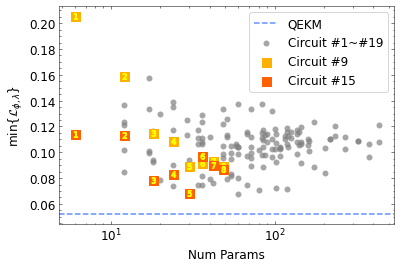

In [19]:
%matplotlib inline
cid=9
not15 = min_select_result.loc[min_select_result['circuit_id']!=cid]
yes15 = min_select_result.loc[min_select_result['circuit_id']==cid]
plt.scatter(not15['num_params'], not15['last_cost_avg'], marker='o', color='grey', alpha=0.7, linewidth=0, label='Circuit #1~#19')#yerr=std_result['num_iter'])
with plt.rc_context({'lines.markersize': 1.5*plt.rcParams['lines.markersize']}):
    plt.scatter(yes15['num_params'], yes15['last_cost_avg'], marker='s', color=c2, label=f'Circuit #{cid}')
for l in range(1, 9):
    plt.scatter(yes15.loc[yes15['layer']==l]['num_params'], yes15.loc[yes15['layer']==l]['last_cost_avg'], marker=f'${l}$', color='yellow')#yerr=std_result['num_iter'])

cid=15
not15 = min_select_result.loc[min_select_result['circuit_id']!=cid]
yes15 = min_select_result.loc[min_select_result['circuit_id']==cid]
with plt.rc_context({'lines.markersize': 1.5*plt.rcParams['lines.markersize']}):
    plt.scatter(yes15['num_params'], yes15['last_cost_avg'], marker='s', color=c3, label=f'Circuit #{cid}')
for l in range(1, 9):
    plt.scatter(yes15.loc[yes15['layer']==l]['num_params'], yes15.loc[yes15['layer']==l]['last_cost_avg'], marker=f'${l}$', color='yellow')#yerr=std_result['num_iter'])
plt.axhline(y=last_cost, linestyle='--', label='QEKM', color=c1)
plt.xscale('log')
plt.xlabel('Num Params')
plt.ylabel('min{' + OBJ_FUNC + '}')
plt.legend()
plt.savefig('./figs/numanal/expr_vs_cost.png')
plt.show()

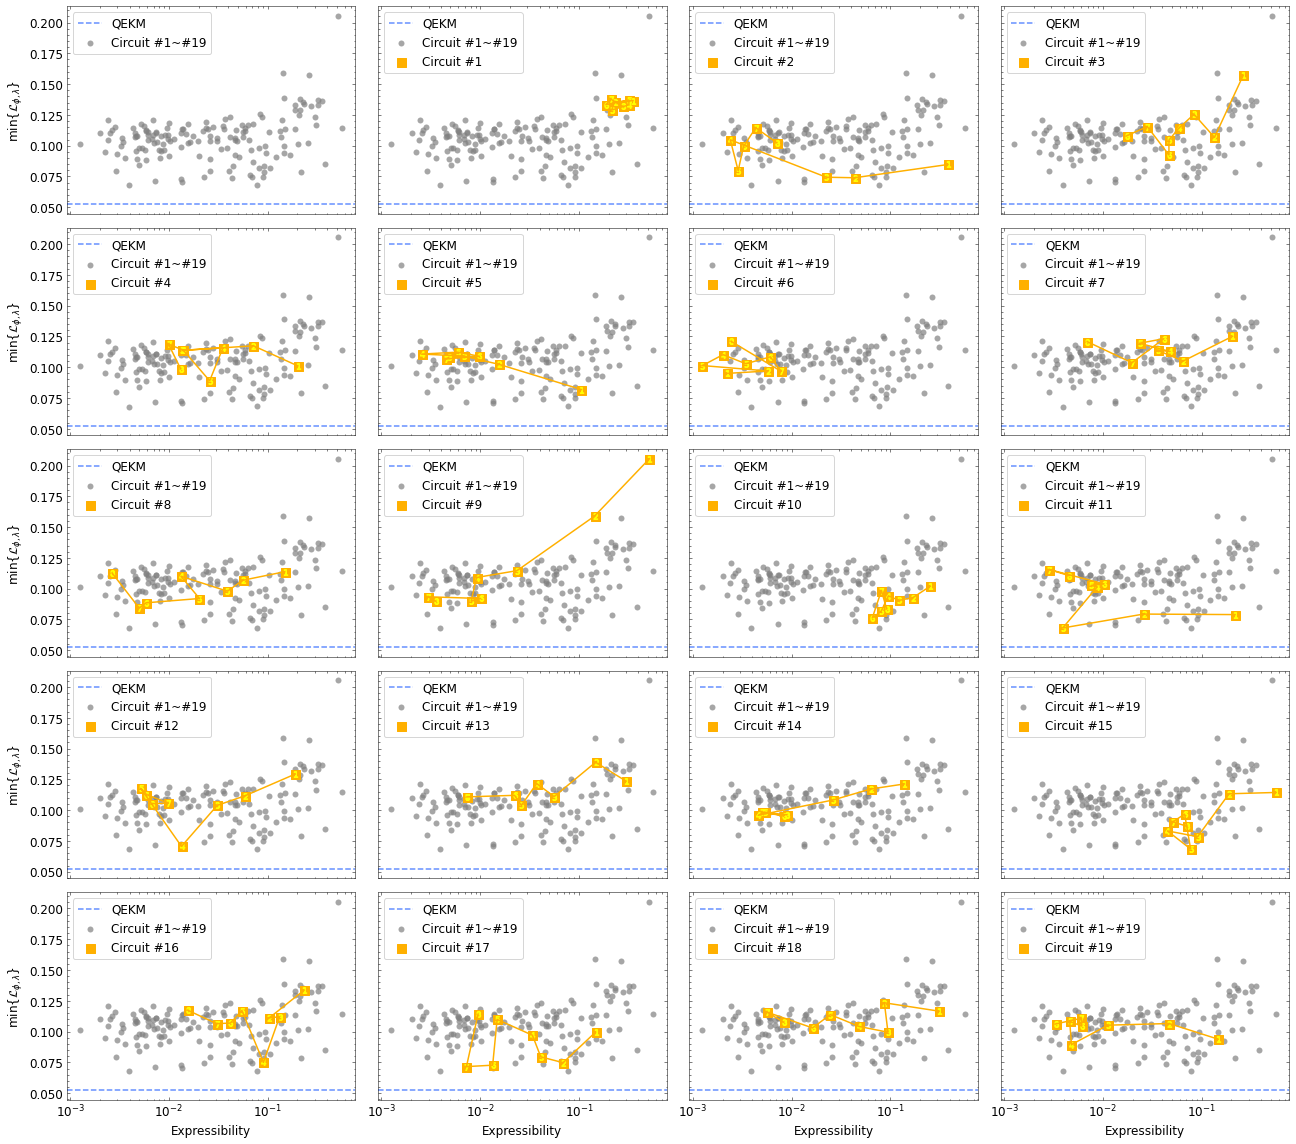

In [20]:
%matplotlib inline
fig, axes = plt.subplots(5, 4, figsize=(3*default_fig_size[0], 4*default_fig_size[1]), squeeze=True, sharex=True, sharey=True)
for cid in list(range(1, 21)):
    ax = axes.flatten()[cid%20]
    not15 = min_select_result.loc[min_select_result['circuit_id']!=cid]
    yes15 = min_select_result.loc[min_select_result['circuit_id']==cid]
    ax.scatter(not15['expr'], not15['last_cost_avg'], marker='o', color='grey', alpha=0.7, linewidth=0, label='Circuit #1~#19')#yerr=std_result['num_iter'])
    ax.plot(yes15['expr'], yes15['last_cost_avg'], marker='', color=c2)
    if cid<20:
        with plt.rc_context({'lines.markersize': 1.5*plt.rcParams['lines.markersize']}):
            ax.scatter(yes15['expr'], yes15['last_cost_avg'], marker='s', color=c2, label=f'Circuit #{cid}')
    for l in range(1, 9):
        ax.scatter(yes15.loc[yes15['layer']==l]['expr'], yes15.loc[yes15['layer']==l]['last_cost_avg'], marker=f'${l}$', color='yellow')#yerr=std_result['num_iter'])
    ax.axhline(y=last_cost, linestyle='--', label='QEKM', color=c1)
    ax.set_xscale('log')
    if cid%20 in [0, 4, 8, 12, 16]:
        ax.set_ylabel('min{' + OBJ_FUNC + '}')
    if cid%20 in [16, 17, 18, 19]:
        ax.set_xlabel('Expressibility')
    ax.legend()
plt.tight_layout()
plt.savefig('./figs/numanal/si_expr_vs_cost.png')
plt.show()

In [21]:
"""from classifiers.convex.svm import BinarySVM
from qiskit_machine_learning.kernels import QuantumKernel

quantum_kernel = QuantumKernel(qasvm.feature_map, enforce_psd=False, quantum_instance=qasvm.quantum_instance)
def my_kernel(x, y):
    return (np.abs(quantum_kernel.evaluate([x], [y]))**2).item()
svm = BinarySVM(kernel=my_kernel, mutation='REDUCED_QASVM', k=qasvm.lamda, C=None)
svm.fit(qasvm.data, qasvm.label)
svm_f = svm.f(Xt)
svm_cost = svm.result['dual objective']
svm_acc = sum(np.where(svm_f*(2*yt-1)>0, 1, 0))/len(yt)
pqasvm_f = pqasvm.f(Xt)
pqasvm_acc = sum(np.where(pqasvm_f*(2*yt-1)>0, 1, 0))/len(yt)"""

import dill
import json

with open(DATA_DIR / 'Classical/svm', 'rb') as f:
    svm = dill.load(f)
    
with open(DATA_DIR / 'Classical/svm_result.json', 'r') as f:
    svm_acc = json.load(f)['accuracy']
    
with open(DATA_DIR / 'Classical/pqasvm_blocing_result.json', 'r') as f:
    pqasvm_acc = json.load(f)['accuracy']

with open(DATA_DIR / '(15, 5)-1024/full_result.json', 'r') as f: 
    d = json.load(f)
    qasvm_f = d['f']
    qasvm_acc = d['accuracy']

In [22]:

print('\t svm\t pqasvm\t qasvm')
print('error\t {:.2f}\t {:.2f}\t {:.2f}'.format(1-svm_acc, 1-pqasvm_acc, 1-qasvm_acc))
print('cost\t {:.2f}\t {:.2f}\t {:.2f}+-{:.2f}'.format(svm.result['dual objective'], last_cost, qasvm_storage.last_cost_avg(16, ignore_rejected=True), qasvm_storage.last_cost_std(16, ignore_rejected=True)))
print('epochs\t {:}\t {:}\t {:}'.format(svm.result['iterations'], len(storage.data), len(qasvm_storage.data)))

	 svm	 pqasvm	 qasvm
error	 0.04	 0.07	 0.07
cost	 0.02	 0.05	 0.06+-0.01
epochs	 10	 32767	 1023


In [44]:
from classifiers.quantum.ansatz import sample_circuit, TwoLocal
for cid in range(1, 20):
    qc = sample_circuit(cid)(4, 2, insert_barriers=True)
    if isinstance(qc, TwoLocal):
        qc = qc.decompose()
    if cid==5 or cid==6:
        fig = qc.draw('mpl', fold=-1, plot_barriers=False)
    else:
        fig = qc.draw('mpl', fold=-1, plot_barriers=False)
    fig.savefig(f'./figs/si/circuit{cid}.pdf', dpi=300)

In [24]:
"""from classifiers.quantum.qasvm import NormQSVM, ParameterVector, QuantumCircuit
from classifiers.quantum.ansatz import Circuit9
feature_map1 = Circuit9(4, 1)
feature_map = feature_map1.copy()
feature_map.compose(feature_map1, inplace=True)
var_form = QuantumCircuit(6)
for i in range(6):
    var_form.h(i)
uniform_iris_qasvm = NormQSVM(data=X, label=y, quantum_instance=qasvm.quantum_instance, feature_map=feature_map, var_form=var_form, lamda=qasvm.lamda)"""

'from classifiers.quantum.qasvm import NormQSVM, ParameterVector, QuantumCircuit\nfrom classifiers.quantum.ansatz import Circuit9\nfeature_map1 = Circuit9(4, 1)\nfeature_map = feature_map1.copy()\nfeature_map.compose(feature_map1, inplace=True)\nvar_form = QuantumCircuit(6)\nfor i in range(6):\n    var_form.h(i)\nuniform_iris_qasvm = NormQSVM(data=X, label=y, quantum_instance=qasvm.quantum_instance, feature_map=feature_map, var_form=var_form, lamda=qasvm.lamda)'

In [25]:
"""uniform_iris_qasvm.cost_fn(uniform_iris_qasvm.parameters)"""

'uniform_iris_qasvm.cost_fn(uniform_iris_qasvm.parameters)'

In [26]:
"""uniform_iris_qasvm.accuracy(Xt, yt)"""

'uniform_iris_qasvm.accuracy(Xt, yt)'

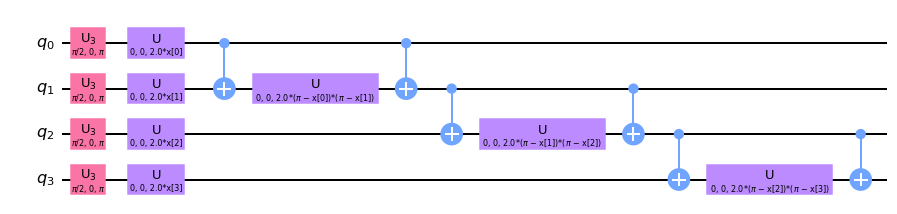

In [22]:
# from classifiers.quantum.ansatz import sample_circuit, TwoLocal
import matplotlib.pyplot as plt
from qiskit.circuit.library import ZZFeatureMap
qc_linear = ZZFeatureMap(feature_dimension=4, reps=1, entanglement='linear')
qc_linear.decompose().decompose().decompose().draw('mpl', fold=-1, plot_barriers=True)
#plt.savefig('./figs/zzfeaturemap.pdf', dpi=300)
#plt.show()